In [72]:
import pandas as pd
import numpy as np

In [73]:
df_fun=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_fun.xlsx")

In [74]:
df_tn=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_june2025_onwards.xlsx")

preparation data

In [75]:
print(df_tn.shape)
print(df_tn.isnull().sum())
print(df_tn.describe())

(69362, 8)
symbol         0
time           0
close_price    0
high_price     0
low_price      0
open_price     0
value          0
volume         0
dtype: int64
                                time   close_price    high_price  \
count                          69362  69362.000000  69362.000000   
mean   2025-08-01 21:57:51.906807552      9.963896     10.069459   
min              2025-06-04 00:00:00      0.010000      0.010000   
25%              2025-07-02 00:00:00      0.900000      0.910000   
50%              2025-08-01 00:00:00      2.680000      2.720000   
75%              2025-09-02 00:00:00      7.158460      7.250000   
max              2025-10-01 00:00:00    350.000000    360.000000   
std                              NaN     29.165057     29.381371   

          low_price    open_price          value        volume  
count  69362.000000  69362.000000   69362.000000  6.936200e+04  
mean       9.858781      9.962452       7.314754  5.693653e+06  
min        0.010000      0.01000

In [76]:
print(df_fun.shape)
print(df_fun.isnull().sum())
print(df_fun.describe())

(907, 7)
symbol           0
eps             64
pe              71
pbv              8
percentyield     7
volume           0
marketcap        0
dtype: int64
              eps            pe         pbv  percentyield        volume  \
count  843.000000    836.000000  899.000000    900.000000  9.070000e+02   
mean     0.416486     29.970897    1.181869      3.909367  4.594697e+06   
std      2.098391    455.065368    1.845644      3.944323  1.986407e+07   
min    -11.024490      0.000000    0.000000      0.000000  1.000000e+02   
25%     -0.008735      0.000000    0.490000      0.000000  4.120000e+04   
50%      0.070000      9.325000    0.770000      3.280000  3.178100e+05   
75%      0.277725     15.457500    1.280000      6.492500  2.076406e+06   
max     36.741980  13142.170000   33.130000     24.910000  4.516564e+08   

          marketcap  
count  9.070000e+02  
mean   4.609440e+07  
std    2.740798e+08  
min    1.800000e+02  
25%    8.427056e+04  
50%    5.555000e+05  
75%    4.324607

In [77]:
df_fun.dropna(inplace=True)

In [78]:
print(df_fun.isnull().sum())
print(df_fun.shape)

symbol          0
eps             0
pe              0
pbv             0
percentyield    0
volume          0
marketcap       0
dtype: int64
(836, 7)


data viz

เส้นค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โพเนนเชียล (Exponential Moving Average - EMA)

คือเส้นค่าเฉลี่ยของราคาหุ้นย้อนหลังในระยะเวลาต่างๆ กัน (5, 15, 35, 89, และ 200 วัน) โดยให้ความสำคัญกับราคาล่าสุดมากกว่า เส้นเหล่านี้ช่วยบอกถึงแนวโน้มในระยะสั้นไปจนถึงระยะยาว

🔵 EMA5 = ระยะสั้น, สัญญาณไว

🟠 EMA15 = ระยะกลาง, ช่วยกรองสัญญาณ

🟢 EMA35 = แนวโน้มกลาง

🟣 EMA89 = แนวโน้มหลัก

🔴 EMA200 = แนวโน้มระยะยาว (เส้นใหญ่สุด)

In [79]:
import plotly.graph_objects as go

# 🔹 เลือกเฉพาะหุ้น 24CS
ohlc_df = df_tn[df_tn["symbol"] == "DELTA"].copy()

# 🔹 จัดการ index
ohlc_df["time"] = pd.to_datetime(ohlc_df["time"])
ohlc_df = ohlc_df.sort_values("time")
ohlc_df = ohlc_df.set_index("time")
ohlc_df.index.name = "Date"

# 🔹 Rename columns ให้ตรงกับ Plotly
ohlc_df = ohlc_df.rename(columns={
    "open_price": "Open",
    "high_price": "High",
    "low_price": "Low",
    "close_price": "Close",
    "volume": "Volume"
})

# 🔹 เลือกแค่ 200 วันล่าสุด (เพื่อดูง่าย)
ohlc_df = ohlc_df.tail(200)

# 🔹 คำนวณ EMA
for p in [5, 15, 35, 89, 200]:
    ohlc_df[f"EMA{p}"] = ohlc_df["Close"].ewm(span=p, adjust=False).mean()

# ✅ กราฟ Candlestick
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_df.index,
    open=ohlc_df['Open'],
    high=ohlc_df['High'],
    low=ohlc_df['Low'],
    close=ohlc_df['Close'],
    name="Candlestick"
)])

# ✅ เส้น EMA
colors = {5:"blue", 15:"orange", 35:"green", 89:"purple", 200:"red"}
for p in [5, 15, 35, 89, 200]:
    fig.add_trace(go.Scatter(
        x=ohlc_df.index,
        y=ohlc_df[f"EMA{p}"],
        mode="lines",
        line=dict(width=2, color=colors[p]),
        name=f"EMA{p}"
    ))

# ✅ Volume
fig.add_trace(go.Bar(
    x=ohlc_df.index,
    y=ohlc_df['Volume'],
    name="Volume",
    marker_color="lightblue",
    opacity=0.5,
    yaxis="y2"
))

# ✅ Layout
fig.update_layout(
    title="DELTA Stock Candlestick Chart with EMA(5,15,35,89,200) and Volume",
    yaxis=dict(title="Price", domain=[0.3, 1]),
    yaxis2=dict(title="Volume", domain=[0, 0.25]),
    xaxis=dict(title="Date"),
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    width=950,
    height=600
)

fig.show()


gruoping

In [80]:
import ta

def compute_technical_grades(df_candle, band_pct=0.015):
    df_result = []

    for symbol, df_sym in df_candle.groupby('symbol'):
        df_sym = df_sym.sort_values('time').copy()
        df_sym = df_sym.dropna(subset=['close_price'])  # ลบแถวที่ไม่มีราคา

        # ถ้าข้อมูลน้อยเกินไป ข้ามไป
        if len(df_sym) < 50:
            continue

        # คำนวณ EMA + RSI
        df_sym['ema5']   = df_sym['close_price'].ewm(span=5).mean()
        df_sym['ema15']  = df_sym['close_price'].ewm(span=15).mean()
        df_sym['ema35']  = df_sym['close_price'].ewm(span=35).mean()
        df_sym['ema89']  = df_sym['close_price'].ewm(span=89).mean()
        df_sym['ema200'] = df_sym['close_price'].ewm(span=200).mean()
        df_sym['rsi']    = ta.momentum.RSIIndicator(close=df_sym['close_price'], window=14).rsi()

        # ลบ NaN หลังคำนวณ indicator
        df_sym = df_sym.dropna(subset=['ema5','ema15','ema35','ema89','ema200','rsi'])
        if df_sym.empty:
            continue

        # ใช้ข้อมูลล่าสุด
        row = df_sym.iloc[-1]
        c, r = row['close_price'], row['rsi']
        e5, e15, e35, e89, e200 = row['ema5'], row['ema15'], row['ema35'], row['ema89'], row['ema200']

        # Logic grading
        if c >= e5 and r >= 70:
            grade = 'a'
        elif c >= e35 and e35 >= e89:
            grade = 'b'
        elif c >= e89 and (max([e5,e15,e35,e89]) - min([e5,e15,e35,e89])) / np.mean([e5,e15,e35,e89]) <= band_pct:
            grade = 'c'
        elif c < e89 and c < e200 and e89 < e200:
            grade = 'd'
        elif c < e5 < e15 < e35 < e89 < e200 and r <= 30:
            grade = 'e'
        else:
            grade = 'c'   # ตั้งค่า default

        df_result.append({
            'symbol': symbol,
            'time': row['time'],
            'close_price': row['close_price'],
            'high_price': row['high_price'],
            'low_price': row['low_price'],
            'open_price': row['open_price'],
            'value': row['value'],
            'trend_grade': grade,
        })

    return pd.DataFrame(df_result)


In [81]:
df_result = compute_technical_grades(df_tn)    

In [82]:
df_result.head(10)

,symbol,time,close_price,high_price,low_price,open_price,value,trend_grade
0,24CS,2025-10-01,1.14,1.14,1.13,1.13,43498,c
1,2S,2025-09-30,2.62,2.66,2.62,2.66,0,c
2,3BBIF,2025-09-30,6.50,6.60,6.45,6.60,0,b
3,A,2025-09-30,4.84,4.86,4.84,4.86,0,d
4,A5,2025-10-01,1.87,1.87,1.87,1.87,187,d
5,AAI,2025-09-30,4.90,5.00,4.90,4.90,0,b
6,AAV,2025-09-30,1.27,1.29,1.25,1.28,0,c
7,ABM,2025-09-30,0.81,0.85,0.81,0.84,0,b
8,ACC,2025-09-30,0.53,0.56,0.52,0.53,0,b
9,ACE,2025-09-30,1.31,1.31,1.29,1.30,0,b


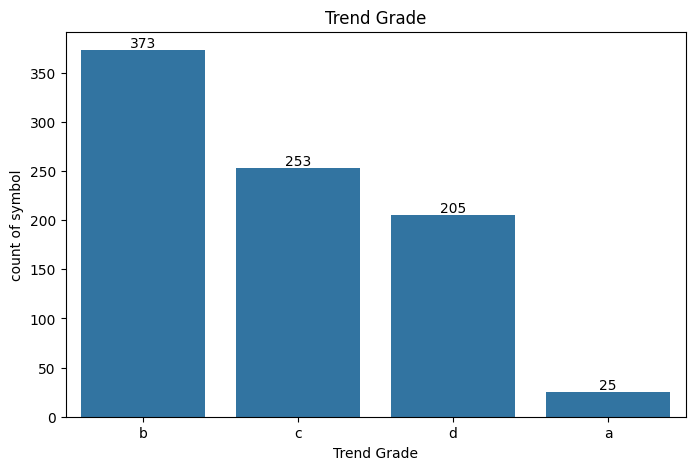

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_result, x="trend_grade", order=df_result["trend_grade"].value_counts().index)

plt.title("Trend Grade")
plt.xlabel("Trend Grade")
plt.ylabel("count of symbol")

# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()


# 📊 การแบ่งกลุ่มหุ้นตามปัจจัยพื้นฐาน (Fundamental Group)

การจัดกลุ่มหุ้นด้วยปัจจัยพื้นฐาน (Fundamental) ใช้ตัวชี้วัดทางการเงินหลัก 5 ตัว ได้แก่:

* **EPS (Earnings Per Share)** → กำไรต่อหุ้น ยิ่งสูงยิ่งดี
* **PE (Price-to-Earnings Ratio)** → ราคาหุ้นเทียบกับกำไร ยิ่งต่ำยิ่งดี
* **PBV (Price-to-Book Value Ratio)** → ราคาหุ้นเทียบกับมูลค่าทางบัญชี แสดงระดับการประเมินมูลค่า
* **Percent Yield (Dividend Yield)** → อัตราผลตอบแทนจากเงินปันผล (%) ยิ่งสูงยิ่งดี
* **Market Cap (Market Capitalization)** → มูลค่าตลาด ยิ่งสูงยิ่งมั่นคง

---

## 🔎 ขั้นตอนการคำนวณ

1. **เลือกข้อมูลพื้นฐาน (Features)**
   นำค่า `eps, pe, pbv, percentyield, marketcap` ของหุ้นแต่ละตัวมาใช้

2. **ทำการ Standardization (Z-score Normalization)**
   แปลงค่าแต่ละ feature ให้อยู่ในสเกลเดียวกัน (ค่าเฉลี่ย = 0, ส่วนเบี่ยงเบนมาตรฐาน = 1) เพื่อไม่ให้ค่าที่มีขนาดใหญ่ เช่น Market Cap ไปครอบงำค่าคะแนนรวม

3. **สร้างคะแนนรวม (Score)**
   รวมค่าที่ผ่านการปรับสเกลแล้วเป็นคะแนนเดียว

   * `+ EPS` → EPS สูง ดี
   * `- PE` → PE ต่ำ ดี
   * `+ PBV` → PBV สูง (สะท้อนการเติบโต)
   * `+ Dividend Yield` → ปันผลสูง ดี
   * `+ Market Cap` → บริษัทใหญ่มั่นคง

   สูตรคะแนนรวม:

   ```
   Score = (EPS_scaled) - (PE_scaled) + (PBV_scaled) + (Yield_scaled) + (MarketCap_scaled)
   ```

4. **แบ่งออกเป็น 5 กลุ่มด้วย Quantile (qcut)**

   * A = Top 20% (พื้นฐานแข็งแกร่งที่สุด)
   * B = 20–40% (พื้นฐานดี)
   * C = 40–60% (พื้นฐานปานกลาง)
   * D = 60–80% (พื้นฐานอ่อน)
   * E = Bottom 20% (พื้นฐานอ่อนที่สุด)

---

## 🏷 การตีความ

* **A** → หุ้นที่มีปัจจัยพื้นฐานดีที่สุด เหมาะกับการลงทุนระยะยาว
* **B** → หุ้นพื้นฐานดี มีศักยภาพในการเติบโต
* **C** → หุ้นพื้นฐานปานกลาง ความเสี่ยง/โอกาสสมดุล
* **D** → หุ้นพื้นฐานอ่อน เสี่ยงสูงขึ้น
* **E** → หุ้นพื้นฐานอ่อนที่สุด ควรหลีกเลี่ยง


In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. เลือก Features
# --------------------------
features = ["eps", "pe", "pbv", "percentyield", "marketcap"]

# --------------------------
# 2. Standardization (Z-score)
# --------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(df_fun[features])

df_scaled = pd.DataFrame(scaled, columns=[f + "_scaled" for f in features], index=df_fun.index)

# --------------------------
# 3. สร้างคะแนนรวม (Score)
# --------------------------
df_fun["score"] = (
    df_scaled["eps_scaled"]        # + EPS
    - df_scaled["pe_scaled"]       # - PE
    + df_scaled["pbv_scaled"]      # + PBV
    + df_scaled["percentyield_scaled"]  # + Yield
    + df_scaled["marketcap_scaled"]     # + Market Cap
)

# --------------------------
# 4. แบ่งออกเป็น 5 กลุ่ม (Quantile)
# --------------------------
df_fun["fundamental_group"] = pd.qcut(
    df_fun["score"], 
    q=5, 
    labels=["E", "D", "C", "B", "A"]  # E = อ่อนสุด → A = แข็งสุด
)

In [85]:
# ✅ ดูผลลัพธ์
df_fun[['symbol','eps','pe','pbv','percentyield','marketcap','fundamental_group']].head()

,symbol,eps,pe,pbv,percentyield,marketcap,fundamental_group
0,PPPM,0.02000,0.00,0.70,0.00,105500.001572,D
1,TPCH,0.24112,7.90,0.34,13.91,401575.987864,A
3,POLY,0.27632,12.89,2.42,6.38,152320.004272,A
5,VCOM,0.21428,7.85,1.48,10.79,303722.809988,A
6,KDH,4.12186,10.62,1.93,3.01,348900.750000,A


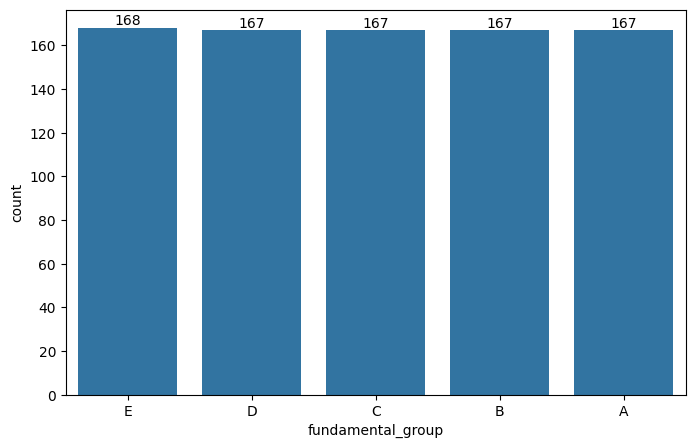

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_fun, x="fundamental_group", order=df_fun["fundamental_group"].value_counts().index)


# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()


In [87]:
# ✅ 1) ดึงแท่งล่าสุดของแต่ละ symbol
df_latest_candle = (
    df_result.sort_values("time")
    .groupby("symbol", as_index=False)
    .tail(1)  # หรือใช้ .last() ก็ได้หลัง sort แล้ว
)

# ✅ 2) Merge กับข้อมูล fundamental
df = pd.merge(df_fun, df_latest_candle, on="symbol", how="inner")
df['quadrant'] = df_fun['fundamental_group'].astype(str) + df_result['trend_grade'].astype(str)

In [88]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,close_price,high_price,low_price,open_price,value,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,0.40,0.43,0.39,0.42,0,d,Dc
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,2.84,2.90,2.84,2.86,0,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,6.80,7.05,6.80,6.90,0,c,NaN
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,2.90,2.94,2.90,2.92,0,b,Ad
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,0.91,0.93,0.91,0.93,0,d,NaN


In [89]:
df.shape

(799, 17)

In [90]:
df.isnull().sum()

symbol                0
eps                   0
pe                    0
pbv                   0
percentyield          0
volume                0
marketcap             0
score                 0
fundamental_group     0
time                  0
close_price           0
high_price            0
low_price             0
open_price            0
value                 0
trend_grade           0
quadrant             60
dtype: int64

In [91]:
def create_quadrant(df, col1="fundamental_group", col2="trend_grade", new_col="quadrant"):
    # normalize ค่าให้ตรง format
    df[col1] = df[col1].astype(str).str.upper()   # A–E
    df[col2] = df[col2].astype(str).str.lower()   # a–e
    
    # รวมกันเป็น quadrant
    df[new_col] = df[col1] + df[col2]
    return df

# ✅ ใช้งาน
df = create_quadrant(df)
print(df[['fundamental_group','trend_grade','quadrant']].head())


  fundamental_group trend_grade quadrant
0                 D           d       Dd
1                 A           c       Ac
2                 A           c       Ac
3                 A           b       Ab
4                 E           d       Ed


In [92]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,close_price,high_price,low_price,open_price,value,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,0.40,0.43,0.39,0.42,0,d,Dd
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,2.84,2.90,2.84,2.86,0,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,6.80,7.05,6.80,6.90,0,c,Ac
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,2.90,2.94,2.90,2.92,0,b,Ab
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,0.91,0.93,0.91,0.93,0,d,Ed


In [93]:
symbols = ["DELTA", "PTT", "AOT", "ADVANC", "KBANK", 
           "TRUE", "GULF", "SCB", "KTC", "KTB", "CPALL"]

df_filtered = df[df['symbol'].isin(symbols)]

df_filtered.head(11)


,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,close_price,high_price,low_price,open_price,value,trend_grade,quadrant
67,KBANK,5.67000,8.09,0.68,7.19,7113291,1.191476e+09,7.195536,A,2025-09-30,167.500000,168.50,166.500000,168.00,0,b,Ab
169,CPALL,1.57000,14.91,3.18,3.00,27433089,1.296213e+09,5.795673,A,2025-09-30,47.250000,48.25,47.250000,48.00,0,b,Ab
279,PTT,1.57000,12.86,0.80,6.62,62633553,2.082566e+09,8.273408,A,2025-09-30,33.250000,33.50,33.250000,33.50,0,b,Ab
290,AOT,0.99837,29.10,4.25,2.09,37282120,1.509926e+09,6.561982,A,2025-09-30,40.500000,40.75,39.750000,40.00,0,b,Ab
343,KTC,1.46000,9.46,1.78,4.76,18935378,5.680613e+08,2.933818,A,2025-09-30,30.000000,30.50,29.750000,30.50,0,b,Ab
402,TRUE,0.10607,0.00,5.08,0.00,140305879,1.459181e+09,5.903172,A,2025-09-30,10.400000,10.60,10.300000,10.60,0,d,Ad
582,DELTA,0.81107,100.50,21.75,0.31,36883092,5.845970e+09,30.241061,A,2025-09-30,158.500000,165.00,158.000000,161.50,0,b,Ab
697,SCB,7.51035,9.03,0.90,8.12,8036020,1.032629e+09,7.874111,A,2025-09-30,128.500000,128.50,127.500000,128.00,0,b,Ab
759,KTB,0.84000,7.54,0.74,6.44,109260312,2.709656e+09,10.058986,A,2025-09-30,24.799999,25.50,24.700001,25.25,0,b,Ab
788,ADVANC,7.25000,21.85,8.51,3.65,6902339,2.008581e+09,13.951199,A,2025-09-30,291.000000,294.00,290.000000,294.00,0,c,Ac


In [94]:
import plotly.graph_objects as go
df_result3=df
# ✅ จัดกลุ่มหุ้นตาม quadrant
quadrant_groups = df_result3.groupby('quadrant')['symbol'].apply(list).to_dict()

# ✅ กำหนดลำดับของแกน
financial_levels = ['A', 'B', 'C', 'D', 'E']  # A = Strong fundamentals
trend_levels = ['a', 'b', 'c', 'd', 'e']      # a = Bullish, e = Crash

# ✅ เตรียมข้อมูลแต่ละเซลล์ในตาราง (5x5)
plot_table = []
for f in financial_levels:
    row = []
    for t in trend_levels:
        code = f + t
        stocks = quadrant_groups.get(code, [])
        if stocks:
            stock_list = "<br>".join(stocks[:10])  # แสดงสูงสุด 10 ตัว
            cell_text = f"<b>{code}</b><br>{stock_list}"
        else:
            cell_text = f"<b>{code}</b><br>-"
        row.append(cell_text)
    plot_table.append(row)

# ✅ สร้างสีของแต่ละแถวตามกลุ่มพื้นฐาน A–E
colors = [[{'A': '#2ecc71', 'B': '#58d68d', 'C': '#f4d03f', 'D': '#f39c12', 'E': '#e74c3c'}[f]]*5 for f in financial_levels]

# ✅ Plotly Table
fig = go.Figure(data=go.Table(
    header=dict(
        fill_color="#dcdcdc",
        align="center",
        font=dict(color="black", size=14)
    ),
    cells=dict(
        values=plot_table,
        fill_color=colors,
        align="center",
        height=100,
        font=dict(color="white", size=12)
    )
))

# ✅ ตั้งชื่อกราฟ
fig.update_layout(title="📊 Stock Quadrant Table (Aa–Ee) จาก Rule-Based or Model")
fig.show()


In [95]:
import plotly.express as px
quadrant_counts = df_result3['quadrant'].value_counts().sort_index()
financial_levels = ["A","B","C","D","E"]   # กลุ่มพื้นฐาน (Fundamental)
trend_levels = ["a","b","c","d","e"]       # กลุ่มเทคนิค (Trend)

heatmap_data = pd.DataFrame(0, index=financial_levels, columns=trend_levels)
for q, count in quadrant_counts.items():
    fin = q[0]   # เช่น "A"
    trend = q[1] # เช่น "a"
    heatmap_data.loc[fin, trend] = count
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Trend (a–e)", y="Fundamental Group (A–E)", color="Stock Count"),
    x=trend_levels,
    y=financial_levels,
    color_continuous_scale="YlOrRd",
    text_auto=True
)
fig.update_layout(title="📊 Quadrant Heatmap")

MODELING

1.K-mean

2.tree

3.knn

4.ann

5.deep

In [96]:
df_all = df.copy()

In [97]:
df_all.columns

Index(['symbol', 'eps', 'pe', 'pbv', 'percentyield', 'volume', 'marketcap',
       'score', 'fundamental_group', 'time', 'close_price', 'high_price',
       'low_price', 'open_price', 'value', 'trend_grade', 'quadrant'],
      dtype='object')

In [98]:
df_all = df_all.drop(columns=['score', 'fundamental_group', 'time','trend_grade','value'])

In [99]:
df_all.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,close_price,high_price,low_price,open_price,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,0.40,0.43,0.39,0.42,Dd
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.84,2.90,2.84,2.86,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,6.80,7.05,6.80,6.90,Ac
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,2.90,2.94,2.90,2.92,Ab
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,0.91,0.93,0.91,0.93,Ed


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
# ✅ Features & Target
X = df_all[features].dropna().copy()
y = df_all.loc[X.index, 'quadrant']

# ✅ Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✅ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [101]:
def summarize_results(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"✅ {name}")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    return {
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1
    }


K-mean

In [109]:
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=25, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

# ✅ Map cluster → true label using Hungarian matching
cont = confusion_matrix(y_encoded, clusters)
row_ind, col_ind = linear_sum_assignment(cont.max() - cont)
cluster_to_class = {col: row for row, col in zip(row_ind, col_ind)}
y_pred_km = np.array([cluster_to_class[c] for c in clusters])

result_kmeans = summarize_results("KMeans (unsupervised)", y_encoded, y_pred_km)


✅ KMeans (unsupervised)
Accuracy: 0.2816
F1 Score: 0.2262


2. Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

result_dt = summarize_results("Decision Tree", y_test, y_pred_dt)


✅ Decision Tree
Accuracy: 0.2062
F1 Score: 0.1909


3. KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

result_knn = summarize_results("KNN", y_test, y_pred_knn)


✅ KNN
Accuracy: 0.3063
F1 Score: 0.268


4. ANN

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


# ✅ Define num_classes = 25
num_classes = len(np.unique(y_encoded))

# ✅ One-hot encode
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# ✅ ANN Model
model_ann = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
model_ann.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# ✅ Predict
y_pred_ann = model_ann.predict(X_test)
y_pred_ann_class = np.argmax(y_pred_ann, axis=1)

# ✅ Evaluate
result_ann = summarize_results("ANN", y_test, y_pred_ann_class)


Epoch 1/30


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0482 - loss: 3.0050 - val_accuracy: 0.1562 - val_loss: 2.8939
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1185 - loss: 2.8643 - val_accuracy: 0.1641 - val_loss: 2.7668
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1593 - loss: 2.7496 - val_accuracy: 0.1719 - val_loss: 2.6379
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2054 - loss: 2.5667 - val_accuracy: 0.1797 - val_loss: 2.5181
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2046 - loss: 2.3964 - val_accuracy: 0.1641 - val_loss: 2.3987
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2101 - loss: 2.3378 - val_accuracy: 0.1719 - val_loss: 2.2960
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2483 - loss: 2.2152 - val_accuracy: 0.3203 - val_loss: 2.2185
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2232 - loss: 2.1599 - val_accuracy: 0.3359 - val_loss: 2.1572
Ep

5. Deep Learning (DNN)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
# ✅ Step 1: กำหนดจำนวนคลาสชัดเจน (ควรได้ 25)
num_classes = 25

# ✅ Step 2: Encode + One-hot ให้มั่นใจว่าขนาดตรงกับ 25 คลาส
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# ✅ Step 3: Deep Neural Network
model_dl = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # ✅ Output = 25 Quadrants
])

model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
model_dl.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ✅ Predict
y_pred_dl = model_dl.predict(X_test)
y_pred_dl_class = np.argmax(y_pred_dl, axis=1)

# ✅ Evaluate
result_dl = summarize_results("Deep Learning (DNN)", y_test, y_pred_dl_class)

Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0313 - loss: 3.7271 - val_accuracy: 0.1406 - val_loss: 3.1748
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1019 - loss: 3.1485 - val_accuracy: 0.2266 - val_loss: 3.1200
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2003 - loss: 2.8362 - val_accuracy: 0.2188 - val_loss: 3.0563
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1941 - loss: 2.7135 - val_accuracy: 0.2656 - val_loss: 2.9843
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2666 - loss: 2.4847 - val_accuracy: 0.2422 - val_loss: 2.9089
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2422 - loss: 2.4311 - val_accuracy: 0.2500 - val_loss: 2.8360
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2723 - loss: 2.3185 - val_accuracy: 0.2422 - val_loss: 2.7460
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2450 - loss: 2.2935 - val_accuracy: 0.2422 - val_loss: 2.6752
Ep

In [112]:
# ✅ แสดงตารางเปรียบเทียบผลลัพธ์ของทั้ง 5 โมเดล
results = pd.DataFrame([
    result_kmeans,
    result_dt,
    result_knn,
    result_ann,
    result_dl
])

# ✅ เรียงตาม Accuracy มาก → น้อย
results = results.sort_values(by="Accuracy", ascending=False)
print(results)


                   Model  Accuracy  F1 Score
3                    ANN  0.331250  0.224857
4    Deep Learning (DNN)  0.312500  0.221685
2                    KNN  0.306250  0.268048
0  KMeans (unsupervised)  0.281602  0.226194
1          Decision Tree  0.206250  0.190882


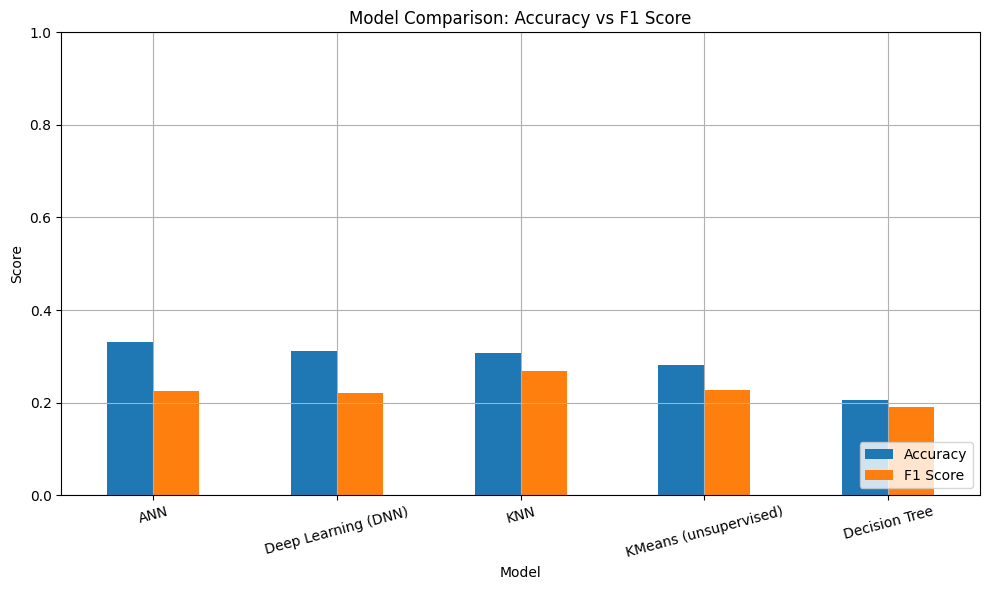

In [113]:
import matplotlib.pyplot as plt

# ✅ Set ชื่อ model เป็น index
results.set_index("Model", inplace=True)

# ✅ วาดกราฟ
results.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
